In [1]:
import numpy as np;
import pandas as pd;
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split;
from sklearn.preprocessing import StandardScaler;
from sklearn.linear_model import LogisticRegression;
from sklearn.metrics import confusion_matrix;
from matplotlib.colors import ListedColormap;

In [2]:
data=pd.read_csv('Social_Network_Ads.csv');


In [3]:
real_x=data.iloc[:,[2,3]].values;
real_y=data.iloc[:,4]

In [4]:
training_x,test_x,training_y,test_y=train_test_split(real_x,real_y,test_size=0.25,random_state=0);

In [5]:
#feature scaling

scaler=StandardScaler();
training_x=scaler.fit_transform(training_x);
test_x=scaler.fit_transform(test_x);

In [6]:
classifier_LR=LogisticRegression(random_state=0);
classifier_LR.fit(training_x,training_y);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
y_pred=classifier_LR.predict(test_x)

In [8]:
c_m=confusion_matrix(test_y,y_pred);
c_m

array([[63,  5],
       [ 7, 25]])

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


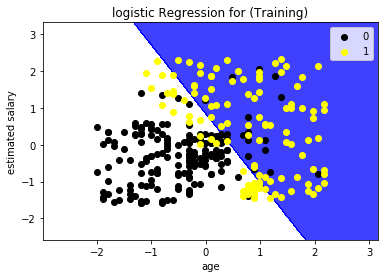

In [9]:
#for testing
x_set,y_set=training_x,training_y
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01));

plt.contourf(x1,x2,classifier_LR.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                         alpha=0.75,cmap=ListedColormap(('white','blue')));
plt.xlim(x1.min(),x1.max());
plt.ylim(x2.min(),x2.max());

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('black','yellow'))(i),label=j);
    
plt.title('logistic Regression for (Training)');
plt.xlabel('age');
plt.ylabel('estimated salary');
plt.legend();
plt.show();

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


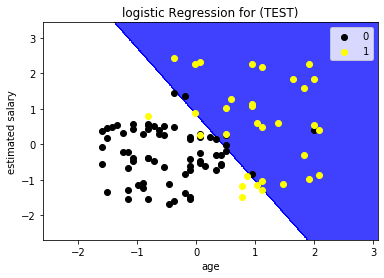

In [10]:
#for testing
x_set,y_set=test_x,test_y
x1,x2=np.meshgrid(np.arange(start=x_set[:,0].min()-1,stop=x_set[:,0].max()+1,step=0.01),
                  np.arange(start=x_set[:,1].min()-1,stop=x_set[:,1].max()+1,step=0.01));

plt.contourf(x1,x2,classifier_LR.predict(np.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
                                         alpha=0.75,cmap=ListedColormap(('white','blue')));
plt.xlim(x1.min(),x1.max());
plt.ylim(x2.min(),x2.max());

for i,j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set==j,0],x_set[y_set==j,1],
                c=ListedColormap(('black','yellow'))(i),label=j);
    
plt.title('logistic Regression for (TEST)');
plt.xlabel('age');
plt.ylabel('estimated salary');
plt.legend();
plt.show();